<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

In [1]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
from matplotlib.dates import DateFormatter
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import folium                             # for data visualization on an interactive leaflet map
import geopandas as gpd
import warnings
warnings.simplefilter("ignore")

In [2]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


##<font color='crimson'> **Milestone #1 - Data Preparation** </font>

In [3]:
# Read the data
df_global = pd.read_csv("/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/OxCGRT_compact_national_v1.csv")
df_global.shape

(202760, 56)

In [4]:
# print info for national dataset
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [5]:
# Print the first few ows for inspection
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [7]:
# Describing the data using the describe function of pandas
global_stats = df_global.describe()
global_stats

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>

In [18]:
# show unique country name and country code values
df_global['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
      

In [20]:
# show unique country code
df_global[ 'CountryCode'].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD',
       'COG', 'COL', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GRC', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND',
       'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LIE', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG',
       'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', 'PAK',

In [27]:
# Create a dataframe with data from Japan only
df_japan = df_global[(df_global['CountryCode'] == 'JPN') & (df_global['CountryName'] == 'Japan')].copy()
df_japan.shape

(1096, 56)

In [28]:
# Print head for Japan datatset
df_japan.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [29]:
# Inspect date
df_japan['Date'].head()

,Date
93160,20200101
93161,20200102
93162,20200103
93163,20200104
93164,20200105


In [30]:
# Convert date to date format
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format='%Y%m%d', errors='coerce')
df_japan = df_japan.sort_values('Date').dropna(subset=['Date'])
df_japan['Date'].head()

,Date
93160,2020-01-01
93161,2020-01-02
93162,2020-01-03
93163,2020-01-04
93164,2020-01-05


**Check the dataset for missing values.**

In [32]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data

,Missing Values,Percentage
CountryName,0,0.000000
CountryCode,0,0.000000
RegionName,1096,100.000000
RegionCode,1096,100.000000
Jurisdiction,0,0.000000
Date,0,0.000000
C1M_School closing,0,0.000000
C1M_Flag,61,5.565693
C2M_Workplace closing,0,0.000000
C2M_Flag,175,15.967153


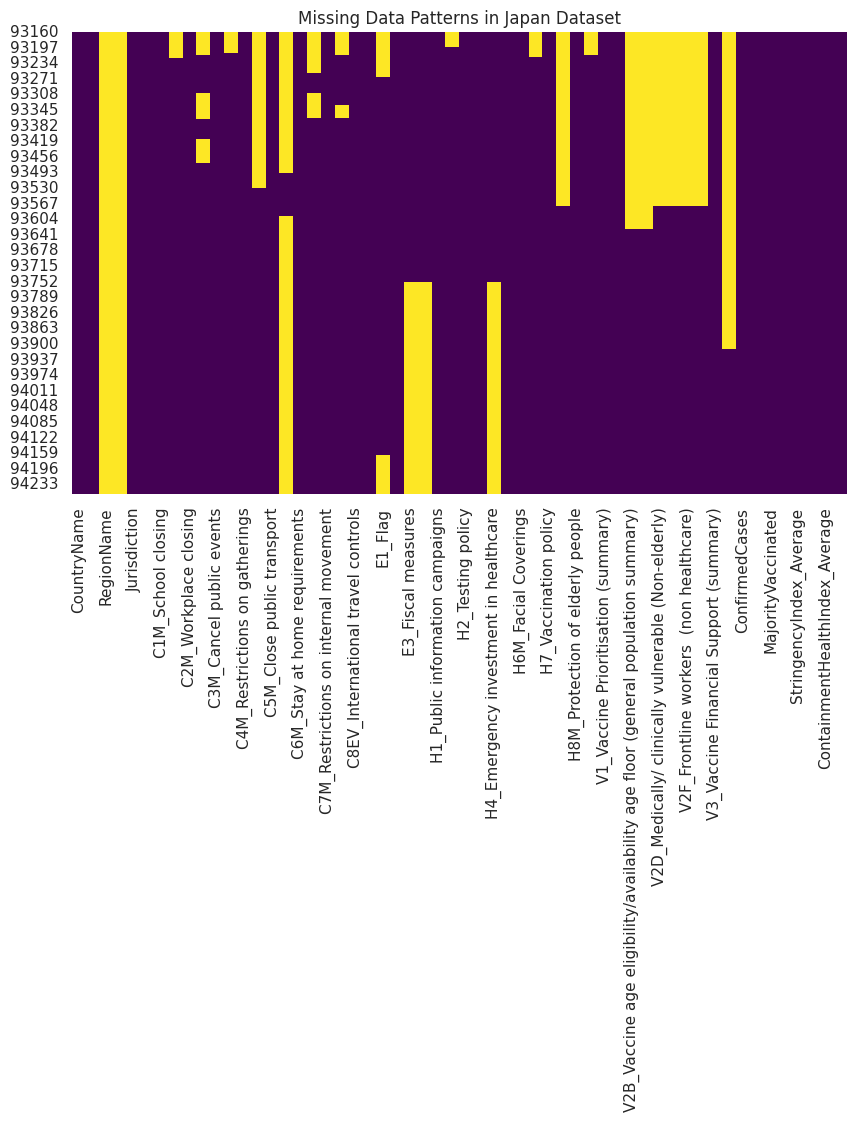

In [33]:
# Heatmap showing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_japan.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns in Japan Dataset')
plt.show()

Here's an overview of the missing values in the dataset:

Columns such as ConfirmedCases, ConfirmedDeaths, and policy indices (StringencyIndex, Investment in vaccines, Facial Coverings, etc.) have 0% missing values, ensuring reliability for core analysis.

RegionName/RegionCode is 100% missing and it is normal since this is national-level data.

Other notable variables with significant missing data include Flag, Mandatory Vaccination, and Fiscal Measures.

In [35]:
# Drop unnecessary columns
cols_to_drop = [
    'RegionName', 'RegionCode',  # 100% missing (national-level data)
    'C5M_Flag'  # >65% missing (unreliable)
]
df_clean = df_japan.drop(columns=cols_to_drop)

In [36]:
# TODO: Describe the data using the describe function of pandas
desc_stats = df_clean = df_japan.drop(columns=cols_to_drop)
.describe()
desc_stats

,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,1096,1096.000000,1035.000000,1096.000000,921.000000,1096.000000,1046.000000,1096.000000,726.000000,1096.000000,...,683.000000,1096.000000,345.0,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2021-07-01 12:00:00,1.150547,0.869565,0.985401,0.295331,0.982664,0.856597,0.768248,0.767218,0.093066,...,1.664714,3.115876,0.0,4.694669e+06,16225.742701,37.470091,40.358184,49.889754,44.706651,86.177007
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-30 18:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.0,8.405375e+04,1581.000000,0.000000,35.190000,48.440000,41.670000,100.000000
50%,2021-07-01 12:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,5.000000,0.0,8.022245e+05,14820.500000,15.690000,43.080000,52.080000,46.650000,100.000000
75%,2022-04-01 06:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,5.000000,0.0,6.626480e+06,28215.750000,81.300000,47.220000,56.670000,50.480000,100.000000
max,2022-12-31 00:00:00,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,5.000000,0.0,2.923468e+07,57274.000000,83.220000,55.090000,61.870000,56.420000,100.000000
std,NaN,0.636887,0.336944,0.552096,0.456439,0.271425,0.350651,0.624562,0.422896,0.290657,...,0.472436,2.424058,0.0,7.533503e+06,15377.587004,38.669190,10.284434,10.878847,9.131039,28.438537


## ===== VISUALIZATIONS =====

**Inspecting Confirmed Cases**

In [41]:
# Calculate daily metrics (with error handling)
df_clean['DailyCases'] = df_clean['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_clean['Cases_7dayAvg'] = df_clean['DailyCases'].rolling(7, min_periods=1).mean()

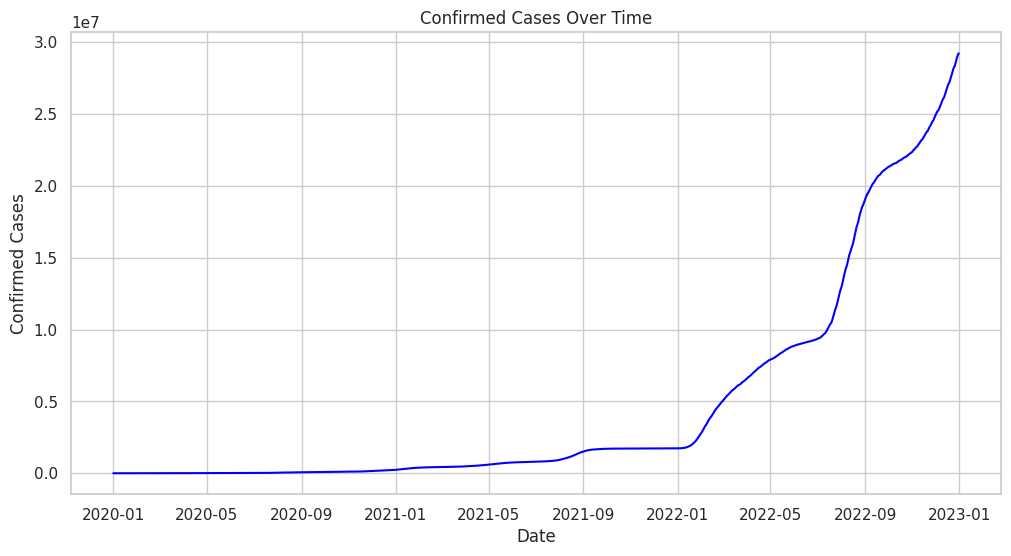

In [50]:
# Plotting confirmed number of cases overtime per week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_clean, color='blue')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Text(0, 0.5, 'Daily Cases')

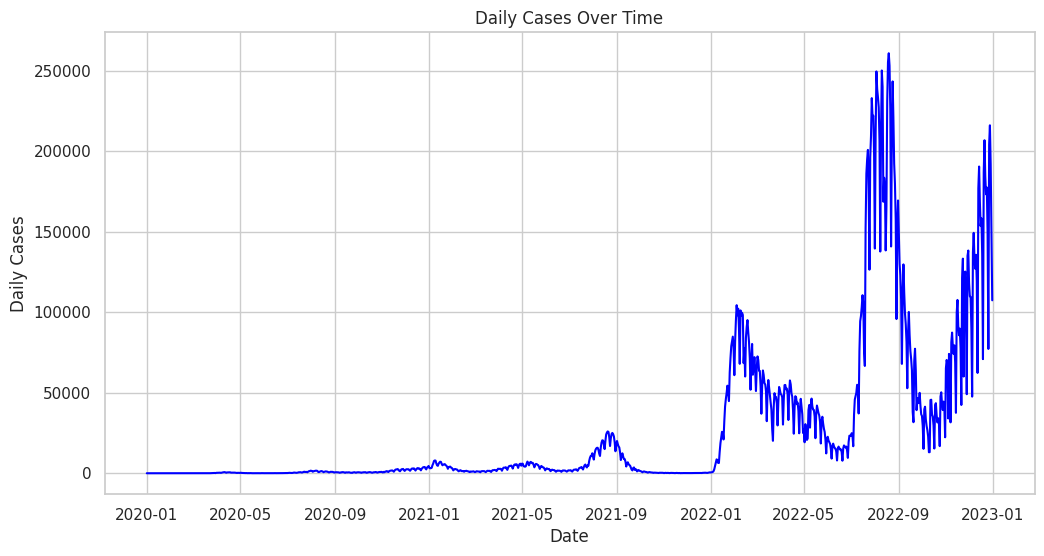

In [51]:
# Plot Daily cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_clean, color='blue')
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

Text(0, 0.5, '7-Day Moving Average')

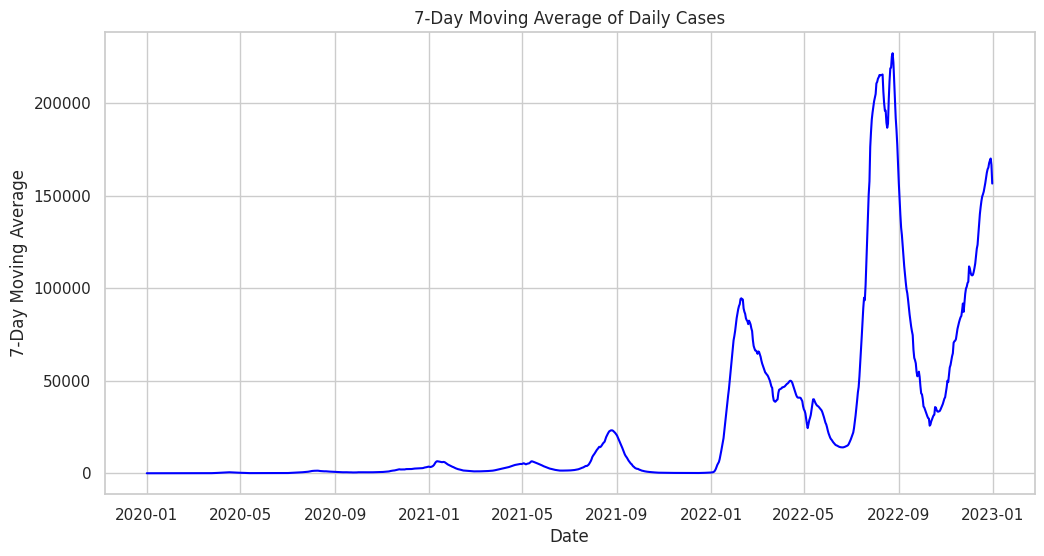

In [53]:
# Plotting 7 day moving average of cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_clean, color='blue')
plt.title('7-Day Moving Average of Daily Cases')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average')

**Inspecting Daily Deaths**

Text(0, 0.5, 'Confirmed Deaths')

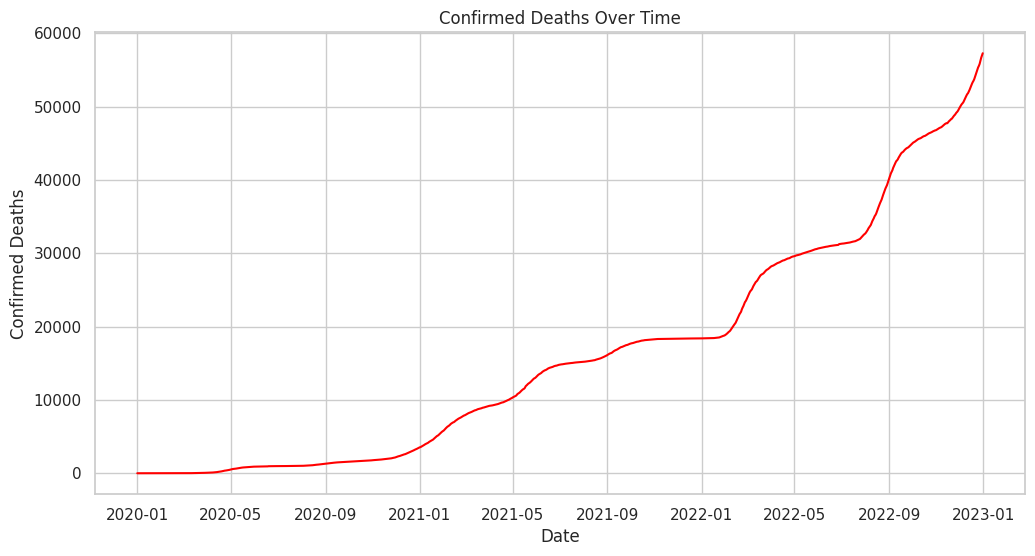

In [49]:
# Plotting confirmed number of deaths overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_clean, color='red')
plt.title('Confirmed Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')

In [ ]:
# Calculate daily metrics of deaths (with error handling)
df_clean['DailyDeaths'] = df_clean['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_clean['Deaths_7dayAvg'] = df_clean['DailyDeaths'].rolling(7, min_periods=1).mean()

Text(0, 0.5, 'Daily Deaths')

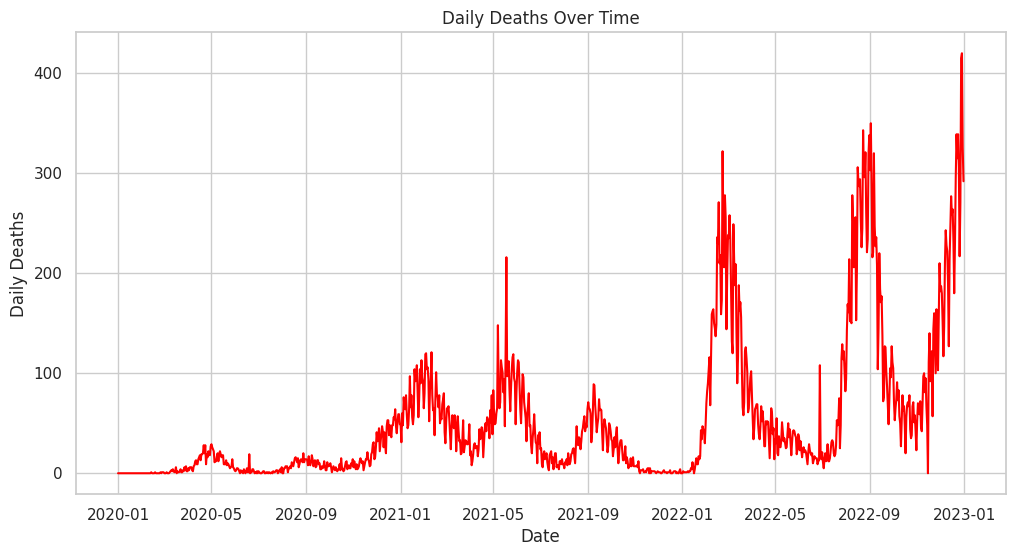

In [52]:
# plot daily deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyDeaths', data=df_clean, color='red')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')

Text(0.5, 0, 'Date')

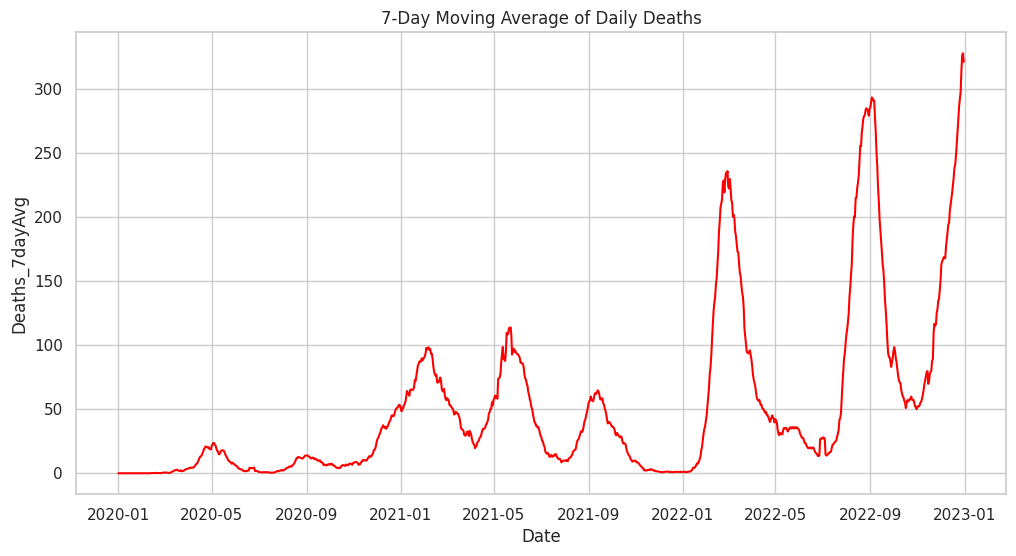

In [54]:
# Plotting 7 day moving average of deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_clean, color='red')
plt.title('7-Day Moving Average of Daily Deaths')
plt.xlabel('Date')

**Introducing Policy Events**

In [57]:
# Key Policy Events (Japan-specific)
policy_events = {
    # 2020
    'First Case Reported': '2020-01-16',
    'School Closures Nationwide': '2020-03-02',
    '1st State of Emergency (7 Prefectures)': '2020-04-07',
    'Nationwide Emergency Expansion': '2020-04-16',
    'GoTo Travel Campaign Paused': '2020-12-28',

    # 2021
    '2nd State of Emergency (11 Prefectures)': '2021-01-07',
    'Vaccine Rollout Begins (Healthcare Workers)': '2021-02-17',
    'Elderly Vaccination Starts': '2021-04-12',
    '3rd State of Emergency (Tokyo/Osaka)': '2021-04-25',
    'Olympics Held Without Spectators': '2021-07-23',
    'Vaccine Passport System Launched': '2021-12-01',

    # 2022
    'Omicron Border Restrictions': '2022-01-08',
    'Booster Shots Accelerated': '2022-03-01',
    'Reopening to Tourists (Guided Tours)': '2022-06-10',
    '7th COVID Wave Peak (BA.5 Variant)': '2022-08-01',
    'Full Tourism Reopening': '2022-10-11',
}

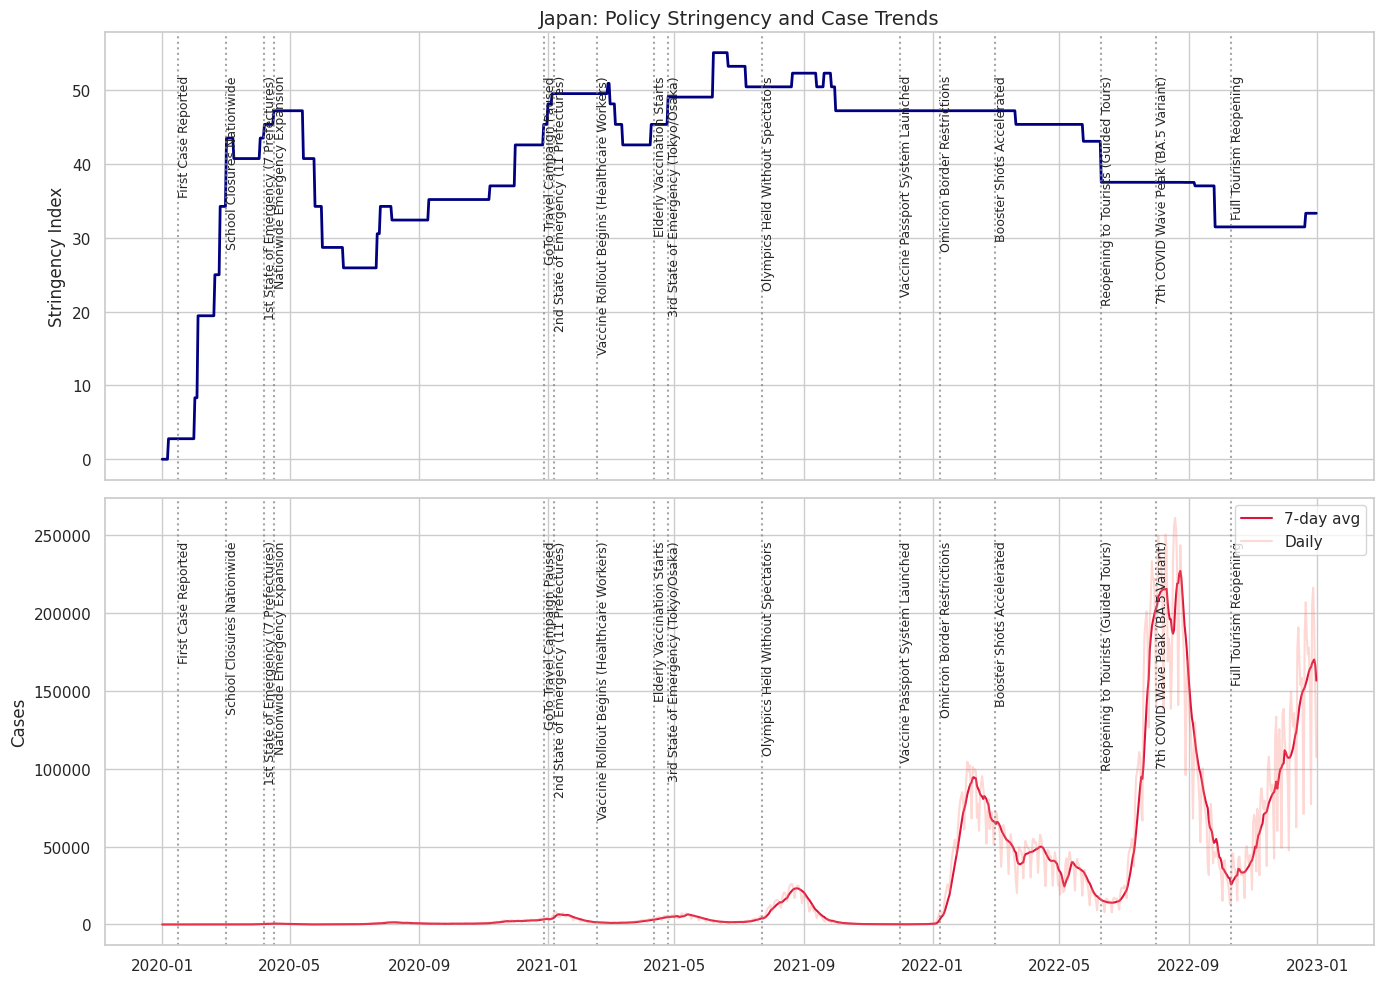

In [61]:
# Plotting Policy Stringency vs Cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Case Trends', fontsize=14)

# Case Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Cases_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyCases'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Cases', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

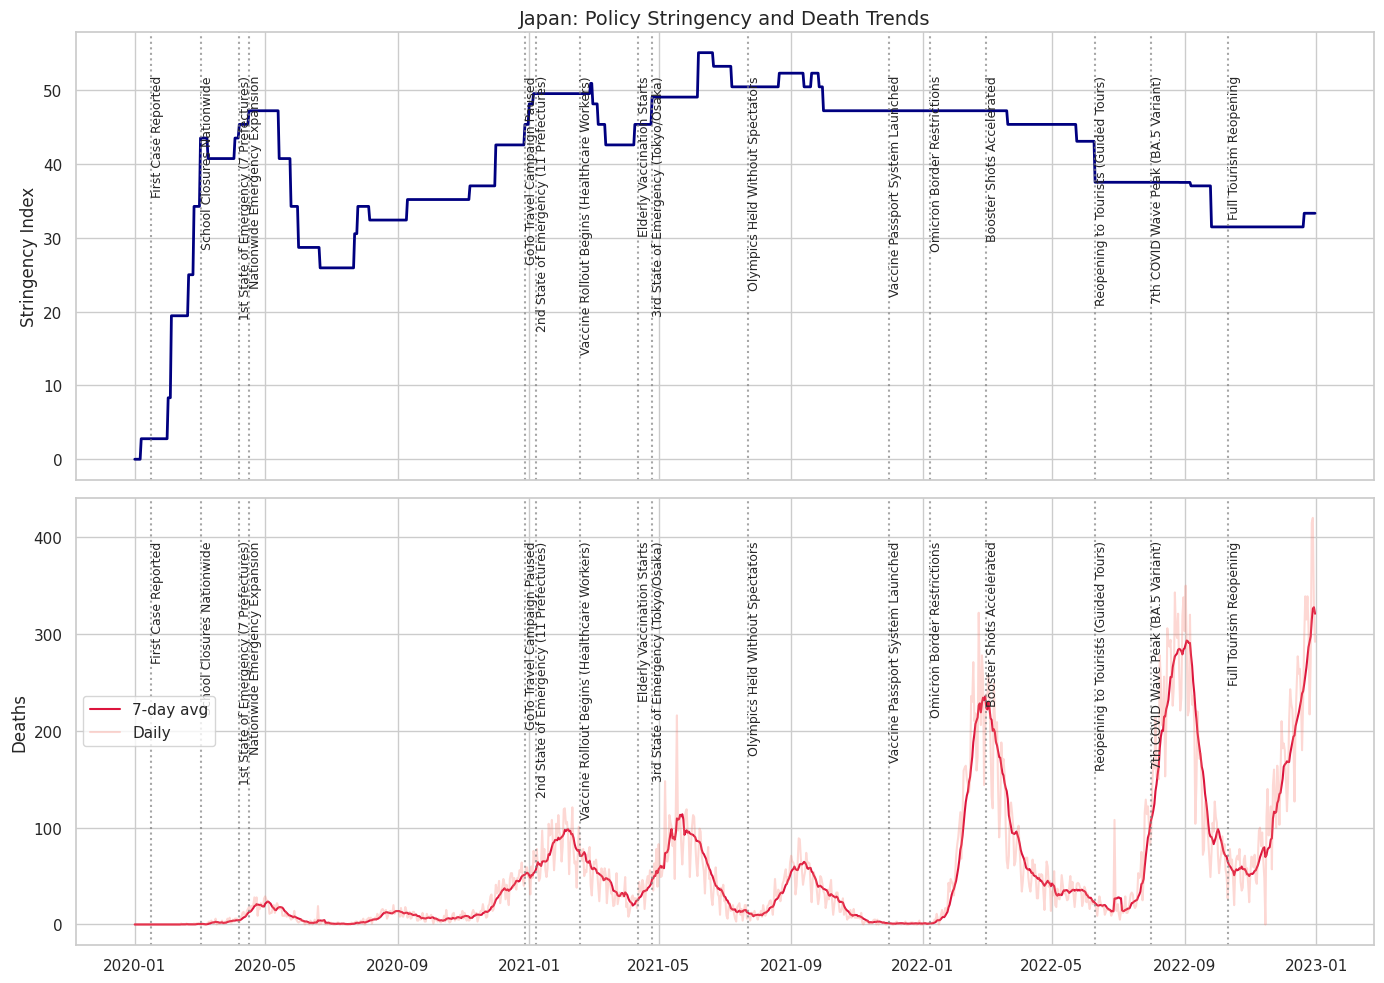

In [63]:
# Plotting Policy Stringency vs Deaths
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Death Trends', fontsize=14)

# Death Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Deaths_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyDeaths'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Deaths', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

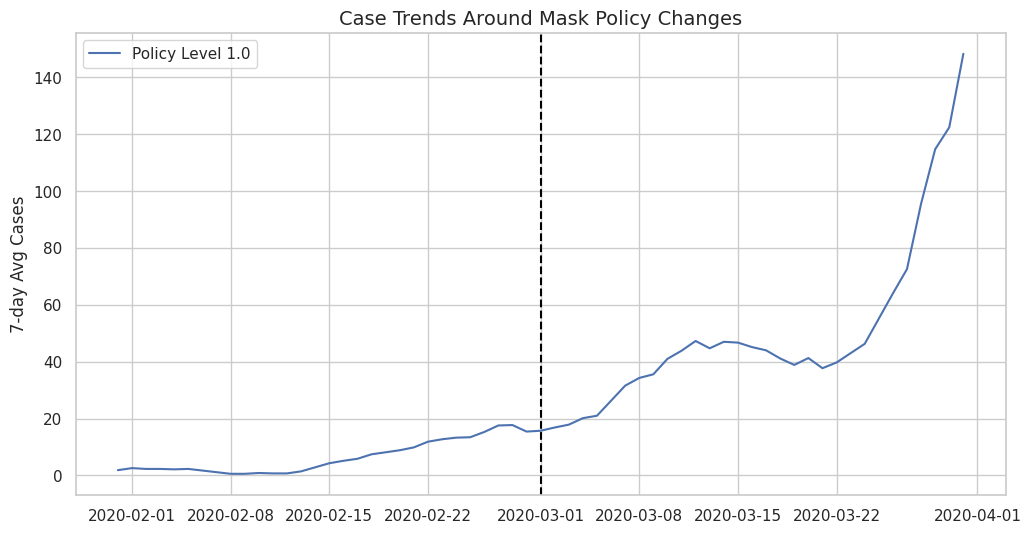

In [11]:
# 2. Mask Policy Effectiveness
# ----------------------------------------------------------
mask_changes = df_japan[df_japan['H6M_Facial Coverings'].diff().abs() > 0.5]

plt.figure(figsize=(12, 6))
for _, row in mask_changes.iterrows():
    window = df_japan[df_japan['Date'].between(
        row['Date'] - pd.Timedelta(days=30),
        row['Date'] + pd.Timedelta(days=30)
    )]

    plt.plot(window['Date'], window['Cases_7dayAvg'],
            label=f"Policy Level {row['H6M_Facial Coverings']}")
    plt.axvline(row['Date'], color='black', linestyle='--')

plt.title('Case Trends Around Mask Policy Changes', fontsize=14)
plt.ylabel('7-day Avg Cases')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
 # 3. Urban vs Rural Analysis (New - Requires Prefecture Data)
# ----------------------------------------------------------
df_prefectures
# This assumes you've loaded prefecture data as df_prefectures
urban_prefs = ['Tokyo', 'Osaka', 'Kanagawa']
rural_prefs = ['Iwate', 'Shimane', 'Tottori']

# Calculate per capita metrics
for df in [df_prefectures]:
    df['CasesPer100k'] = df['DailyCases'] / (df['Population']/100000)
    df['DeathsPer100k'] = df['DailyDeaths'] / (df['Population']/100000)

# Comparative plot
plt.figure(figsize=(12, 6))
for pref in urban_prefs + rural_prefs:
    pref_data = df_prefectures[df_prefectures['Prefecture'] == pref]
    linestyle = '-' if pref in urban_prefs else '--'
    plt.plot(pref_data['Date'], pref_data['CasesPer100k'],
             linestyle=linestyle, label=pref)

plt.title('Urban vs Rural Case Rates (per 100k)', fontsize=14)
plt.ylabel('Cases per 100k')
plt.legend(ncol=2)
plt.show()

NameError: name 'df_prefectures' is not defined

In [ ]:
# 4. Vaccination Impact (Enhanced)
# --------------------------------
# Merge with external vaccine data (example)
vaccine_data = pd.read_csv("japan_vaccinations.csv")  # From Our World in Data
vaccine_data['date'] = pd.to_datetime(vaccine_data['date'])

df_japan = pd.merge_asof(df_japan, vaccine_data,
                        left_on='Date', right_on='date')

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases (7-day avg)', color=color)
ax1.plot(df_japan['Date'], df_japan['Cases_7dayAvg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('% Fully Vaccinated', color=color)
ax2.plot(df_japan['Date'], df_japan['people_fully_vaccinated_per_hundred'],
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Case Rates vs Vaccination Progress', fontsize=14)
plt.show()

## ===== KEY COMPARISONS WITH U.S. =====

In [ ]:
# 1. Policy Strictness Comparison
df_compare = df_global[
    (df_global['CountryName'].isin(['Japan', 'United States'])) &
    (df_global['Jurisdiction'] == 'NAT_TOTAL')
].copy()

# Calculate policy averages
policy_comparison = df_compare.groupby('CountryName').agg({
    'H6M_Facial Coverings': 'mean',
    'StringencyIndex_Average': 'max',
    'H7_Vaccination policy': 'mean'
}).rename(columns={
    'H6M_Facial Coverings': 'Avg Mask Policy',
    'StringencyIndex_Average': 'Max Stringency',
    'H7_Vaccination policy': 'Avg Vaccine Policy'
})

print(policy_comparison)

# ===== NEXT STEPS =====
"""
1. Incorporate MHLW prefecture data for granular analysis
2. Add mobility data from Google Mobility Reports
3. Compare with Ori's U.S. results using normalized metrics
4. Analyze age-specific outcomes (if data available)
"""

In [ ]:
# Filter for countries of interest USA, Japan and South Africa
countries = ['Japan', 'United States']
df = df_global[df_global['CountryName'].isin(countries)]
df.shape

In [ ]:
# Filter for Japan (CountryCode = "JPN") and national-level data (Jurisdiction = "NAT_TOTAL")
df_japan = df_global[(df_global['CountryCode'] == 'JPN') & (df_global['Jurisdiction'] == 'NAT_TOTAL')].copy()

In [ ]:
# inspect date column
df_japan.info()
df_japan.head()

In [ ]:
# Convert date column to datetime and sort by date
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format="%Y%m%d")
df_japan = df_japan.sort_values('Date')
df_japan['Date'].head()

In [ ]:
# Timeline of data
print(df_japan['Date'].min())
print(df_japan['Date'].max())

In [ ]:
# TODO: Leverage the describe() function to assess the summary statistics for confirmed cases and confirmed deaths
cases_stats = df_japan['ConfirmedCases'].describe()
deaths_stats = df_japan['ConfirmedDeaths'].describe()
cases_stats, deaths_stats

In [ ]:
df_japan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Grouping by Age Group
top_age_range_caes = df_japan.groupby('AgeGroup')['ConfirmedCases'].sum().sort_values(ascending=False).head(10)
top_age_ranged_deaths = df_japan.groupby('AgeGroup')['ConfirmedDeaths'].sum().sort_values(ascending=False).head(10)
combined_age_data = pd.concat({'Confirmed Cases': top_age_cases, 'Confirmed Deaths': top_age_deaths}, axis=1)

# Plotting
bar_width = 0.35
fig, ax1 = plt.subplots(figsize=(12, 7))
indices = np.arange(len(combined_age_data))

# Confirmed cases
ax1.bar(indices - bar_width/2, combined_age_data['Confirmed Cases'], bar_width, label='Confirmed Cases', color='skyblue')

# Secondary axis for deaths
ax2 = ax1.twinx()
ax2.bar(indices + bar_width/2, combined_age_data['Confirmed Deaths'], bar_width, label='Confirmed Deaths', color='salmon')

# Titles and labels
ax1.set_title('Top 10 Age Groups by Confirmed COVID-19 Cases and Deaths', fontsize=16)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Confirmed Deaths')
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_age_data.index, rotation=45, ha='right')

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# bar chart to determine which prefectures had higher confirmed cases and deaths
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

top_prectures_confirmed = df_japan.groupby('RegionName')['ConfirmedCases'].sum().sort_values(ascending=False).head(10)
top_prectures_deaths = df_japan.groupby('RegionName')['ConfirmedDeaths'].sum().sort_values(ascending=False).head(10)

combined_data = pd.concat({'Confirmed Cases': top_prectures_confirmed, 'Confirmed Deaths': top_prectures_deaths}, axis=1)

# Set the width of the bars
bar_width = 0.35

# Plotting the combined bar chart with bars next to each other
fig, ax1 = plt.subplots(figsize=(12, 7))

# Generate a list of indices for the x-axis
indices = np.arange(len(combined_data))

# Plotting the bars for cases
ax1.bar(indices - bar_width/2, combined_data['Confirmed Cases'], bar_width, label='Confirmed Cases', color='blue')

# Create a secondary y-axis for deaths
ax2 = ax1.twinx()

# Plotting the bars for deaths
ax2.bar(indices + bar_width/2, combined_data['Confirmed Deaths'], bar_width, label='Confirmed Deaths', color='orange')

# Adding labels and title
ax1.set_title('Top 10 Prefectures with Highest Confirmed Cases and Deaths', fontsize=16)
ax1.set_xlabel('Region Name', fontsize=14)
ax1.set_ylabel('Confirmed Cases', fontsize=14)
ax2.set_ylabel('Confirmed Deaths', fontsize=14)

# Set the label for the secondary y-axis
ax2.set_ylabel('Confirmed Deaths', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_data.index, rotation=45, ha='right')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjusting layout and displaying the combined chart
plt.tight_layout()
plt.show()

In [ ]:
# Calculate daily changes in confirmed cases
df_japan['DailyCases'] = df_japan['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_japan['DailyCases'].describe()

In [ ]:
# Visualisation of daily changes of confirmed cases overtime
plt.figure(figsize=(12, 6))
plt.plot(df_japan['Date'], df_japan['DailyCases'], label='Confirmed Cases Overtime')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate daily changes in confirmed deaths
df_japan['DailyDeaths'] = df_japan['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_japan['DailyDeaths'].describe()

In [ ]:
# Calculate 7-day moving averages
df_japan['Cases_7dayAvg'] = df_japan['DailyCases'].rolling(7).mean()

# Visualisation showing the 7 day moviang averages
plt.figure(figsize=(11, 6))
plt.plot(df_japan['Date'], df_japan['Cases_7dayAvg'], label='7-Day Moving Average of Daily Cases')
plt.plot(df_japan['Date'], df_japan['DailyCases'], label='Daily Cases')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Visualisation of daily changes of confirmed deaths overtime
plt.figure(figsize=(12, 6))
plt.plot(df_japan['Date'], df_japan['DailyDeaths'], label='Confirmed Deaths Overtime')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('Daily Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate 7 day moving averges
df_japan['Deaths_7dayAvg'] = df_japan['DailyDeaths'].rolling(7).mean()
df_japan['Deaths_7dayAvg'].describe()

# Visualisation showing the 7 day moviang averages
plt.figure(figsize=(11, 6))
plt.plot(df_japan['Date'], df_japan['Deaths_7dayAvg'], label='7-Day Moving Average of Daily Deaths')
plt.plot(df_japan['Date'], df_japan['DailyDeaths'], label='Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('Daily Deaths Over Time')
plt.legend()
plt.grid(True)

In [ ]:
# Check columns (focus on policy and outcome variables)
print(df_japan[['Date', 'H6M_Facial Coverings', 'ConfirmedCases', 'ConfirmedDeaths']].head())

In [ ]:
# Average mask wearing policy levels across Japan and USA

# data preparation
df_japan_usa = df_global[(df_global['CountryName'].isin(['Japan', 'United States'])) & (df_global['Jurisdiction'] == 'NAT_TOTAL')]
df_japan_usa['Date'] = pd.to_datetime(df_japan_usa['Date'], format="%Y%m%d")
df_japan_usa = df_japan_usa.sort_values('Date')
df_japan_usa = df_japan_usa.sort_values('Date')
df_japan_usa['DailyCases'] = df_japan_usa['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_japan_usa['Cases_7dayAvg'] = df_japan_usa['DailyCases'].rolling(7).mean()
df_japan_usa['DailyDeaths'] = df_japan_usa['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_japan_usa['Deaths_7dayAvg'] = df_japan_usa['DailyDeaths'].rolling(7).mean()

# Group by country and compute mean values
avg_mask = df_japan_usa.groupby('CountryName')['H6M_Facial Coverings'].mean()
print(avg_mask)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mask.index, y=avg_mask.values)
plt.title('Average Mask Wearing Policy Levels Across Japan and USA')
plt.ylabel('Mean H6M Policy Level')
plt.xlabel('Country')
plt.show()

In [ ]:
# Average vaccination policy levels across Japan and USA
# Group by country and compute mean values
avg_vac = df_japan_usa.groupby('CountryName')['H7_Vaccination policy'].mean()
print(avg_vac)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_vac.index, y=avg_vac.values)
plt.title('Average Vaccination Policy Levels Across Japan and USA')
plt.ylabel('Mean H7 Policy Level')
plt.xlabel('Country')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Policy Strictness
ax[0].plot(df_japan['Date'], df_japan['StringencyIndex_Average'], color='blue')
ax[0].set_ylabel('Stringency Index')

# Cases
ax[1].plot(df_japan['Date'], df_japan['Cases_7dayAvg'], color='red')
ax[1].set_ylabel('Daily Cases (7-day avg)')

# Highlight policy phases
for date, event in [(pd.to_datetime('2020-04-07'), '1st State Emergency'),
                    (pd.to_datetime('2021-01-07'), '2nd State Emergency')]:
    for a in ax:
        a.axvline(date, color='gray', linestyle='--', alpha=0.5)
        a.text(date, a.get_ylim()[1]*0.9, event, rotation=90, va='top')

plt.tight_layout()
plt.show()

In [ ]:
# Compare case growth before/after mask mandates
mask_changes = df_japan[df_japan['H6M_Facial Coverings'].diff() != 0]

for i, row in mask_changes.iterrows():
    period = df_japan[(df_japan['Date'] > row['Date'] - pd.Timedelta(days=14)) &
                     (df_japan['Date'] < row['Date'] + pd.Timedelta(days=14))]

    plt.figure(figsize=(10, 4))
    plt.plot(period['Date'], period['Cases_7dayAvg'])
    plt.axvline(row['Date'], color='r', linestyle='--')
    plt.title(f"Case Trend Around Mask Policy Change (Level {row['H6M_Facial Coverings']})")
    plt.show()

## 1. Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load OxCGRT Japan data
df_japan = df_global[(df_global['CountryCode'] == 'JPN') &
                    (df_global['Jurisdiction'] == 'NAT_TOTAL')].copy()

# Convert dates and calculate daily metrics
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format='%Y%m%d')
df_japan['DailyCases'] = df_japan['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_japan['DailyDeaths'] = df_japan['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_japan['Cases_7dayAvg'] = df_japan['DailyCases'].rolling(7).mean()

## 2. Prefecture-Level Analysis (Equivalent to U.S. States)

In [ ]:
# Load supplemental prefecture data (example structure)
# Source: MHLW https://www.mhlw.go.jp/stf/covid-19/open-data.html
df_prefectures = pd.read_csv("japan_prefectures_covid.csv")

# Calculate per-capita metrics
df_prefectures['CasesPer100k'] = df_prefectures['DailyCases'] / (df_prefectures['Population']/100000)

# Group by urban/rural classification
urban_prefs = ['Tokyo', 'Osaka', 'Kanagawa']
df_prefectures['AreaType'] = df_prefectures['Prefecture'].apply(
    lambda x: 'Urban' if x in urban_prefs else 'Rural'
)

## 3. Key Visualizations
A. National Policy vs. Cases

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_japan['Date'], df_japan['StringencyIndex_Average'],
        color='navy', label='Stringency Index')
ax1.set_ylabel('Policy Strictness')

ax2 = ax1.twinx()
ax2.plot(df_japan['Date'], df_japan['Cases_7dayAvg'],
        color='crimson', label='Cases (7-day avg)')
ax2.set_ylabel('Daily Cases')

plt.title("Japan: COVID Policy Stringency vs. Case Counts")
plt.legend()
plt.show()

B. Prefecture Comparison (Equivalent to U.S. States)

In [ ]:
# Top 5 prefectures by population
top_prefs = ['Tokyo', 'Osaka', 'Kanagawa', 'Aichi', 'Saitama']
df_top = df_prefectures[df_prefectures['Prefecture'].isin(top_prefs)]

plt.figure(figsize=(12,6))
for pref, group in df_top.groupby('Prefecture'):
    plt.plot(group['Date'], group['CasesPer100k'], label=pref)

plt.title("COVID Cases per 100k by Major Prefecture")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

C. Urban vs. Rural Comparison (Comparison to US D/R States Analysis)

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_prefectures, x='Date', y='CasesPer100k',
            hue='AreaType', ci=None)
plt.title("Urban vs. Rural Prefectures: Case Rates per 100k")

## 4. Advanced Analysis
Policy Effectiveness by Wave

In [ ]:
# Define pandemic waves in Japan
waves = {
    '1st': ('2020-04-07', '2020-05-25'),  # First state of emergency
    '2nd': ('2021-01-07', '2021-03-21'),
    '3rd': ('2021-04-25', '2021-06-20')
}

for wave, (start, end) in waves.items():
    period = df_japan[df_japan['Date'].between(start, end)]
    print(f"{wave} Wave:")
    print(f"  Peak Cases: {period['DailyCases'].max()}")
    print(f"  Avg Stringency: {period['StringencyIndex_Average'].mean():.1f}")

Geospatial Visualization

In [ ]:
# Load Japan prefecture shapes
url = "https://raw.githubusercontent.com/dataofjapan/land/master/japan.geojson"
japan_map = gpd.read_file(url)

# Merge with case data
merged = japan_map.merge(
    df_prefectures[df_prefectures['Date'] == '2021-01-15'],  # Example date
    left_on='nam', right_on='Prefecture'
)

merged.plot(column='CasesPer100k', legend=True,
           cmap='OrRd', figsize=(10,8))
plt.title("Japan COVID Cases per 100k by Prefecture")
plt.axis('off')

## 5. Comparative Metrics (vs. U.S.)

In [ ]:
# Compare key metrics
comparison = pd.DataFrame({
    'Japan': [
        df_japan['StringencyIndex_Average'].max(),
        df_japan['DailyCases'].max() / 126e6 * 100000,  # Per 100k
        df_japan['H6M_Facial Coverings'].mean()
    ],
    'US': [
        df_usa[df_usa['Jurisdiction']=='NAT_TOTAL']['StringencyIndex_Average'].max(),
        df_usa[df_usa['Jurisdiction']=='NAT_TOTAL']['DailyCases'].max() / 331e6 * 100000,
        df_usa[df_usa['Jurisdiction']=='STATE_TOTAL']['H6M_Facial Coverings'].mean()
    ]
}, index=['Max Stringency', 'Peak Cases/100k', 'Avg Mask Policy'])

comparison.T.plot(kind='bar', subplots=True, layout=(1,3), figsize=(15,5))